In [41]:
from photutils.background import Background2D, MedianBackground
from astropy.io import fits
import matplotlib.pyplot as plt
import glob
import numpy as np
import matplotlib.pyplot as plt
from photutils.segmentation import detect_sources
from astropy.convolution import convolve
from photutils.segmentation import make_2dgaussian_kernel


File:  ./data\cutout_116.41751861572266_20.9409236907959.fits
File:  ./data\cutout_117.8970184326172_31.84163475036621.fits
Galaxy detected


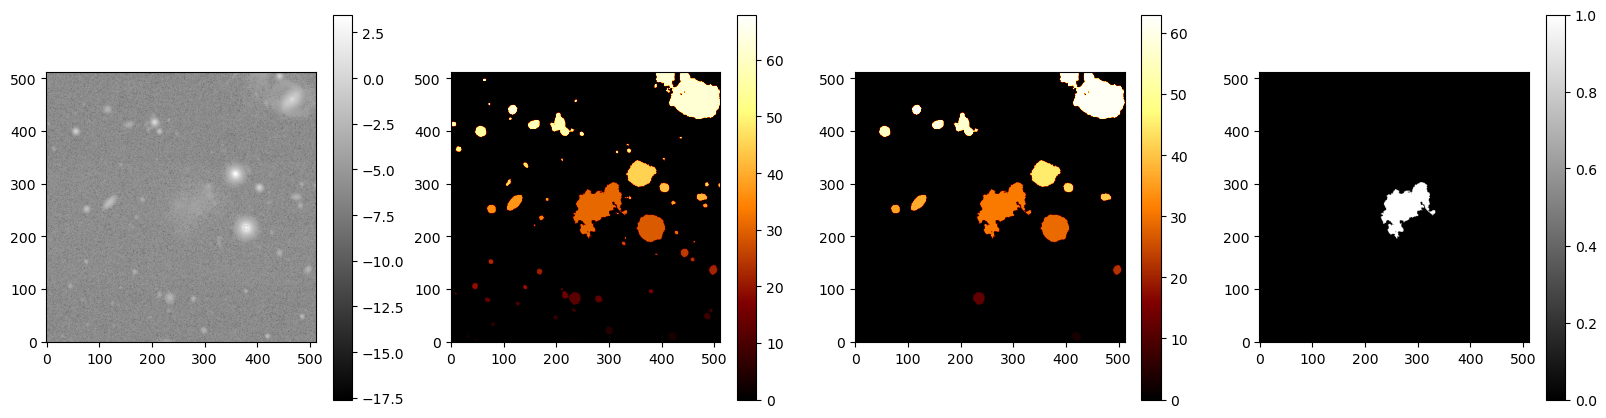

Error in file:  ./data\cutout_121.76517486572266_14.929396629333496.fits
Error in file:  ./data\cutout_121.92533111572266_30.522994995117188.fits
File:  ./data\cutout_122.23558807373048_-0.877392590045929.fits
Galaxy detected


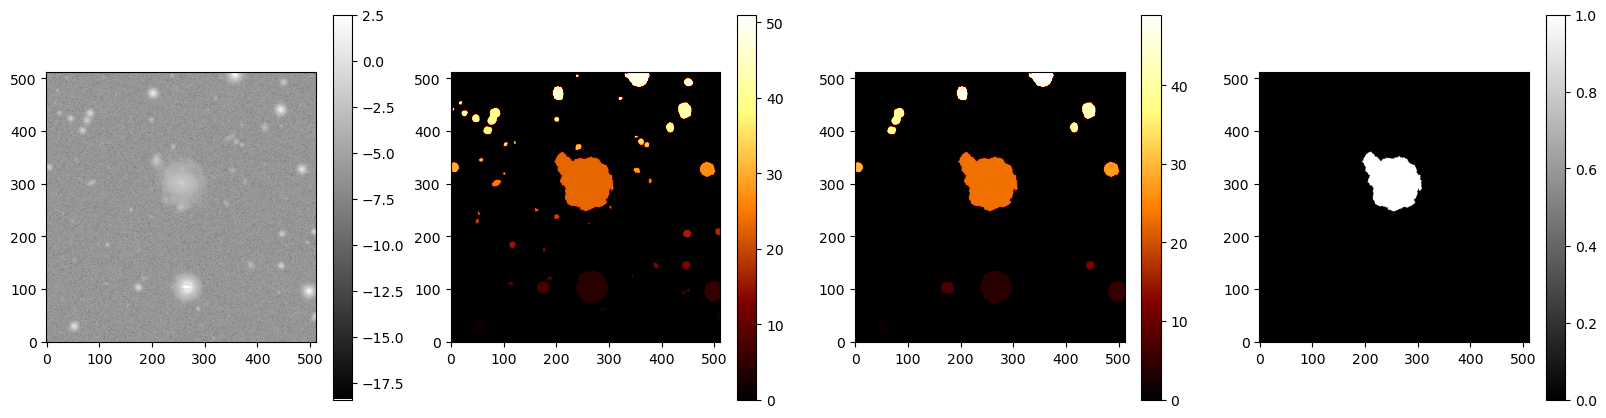

Galaxy detected


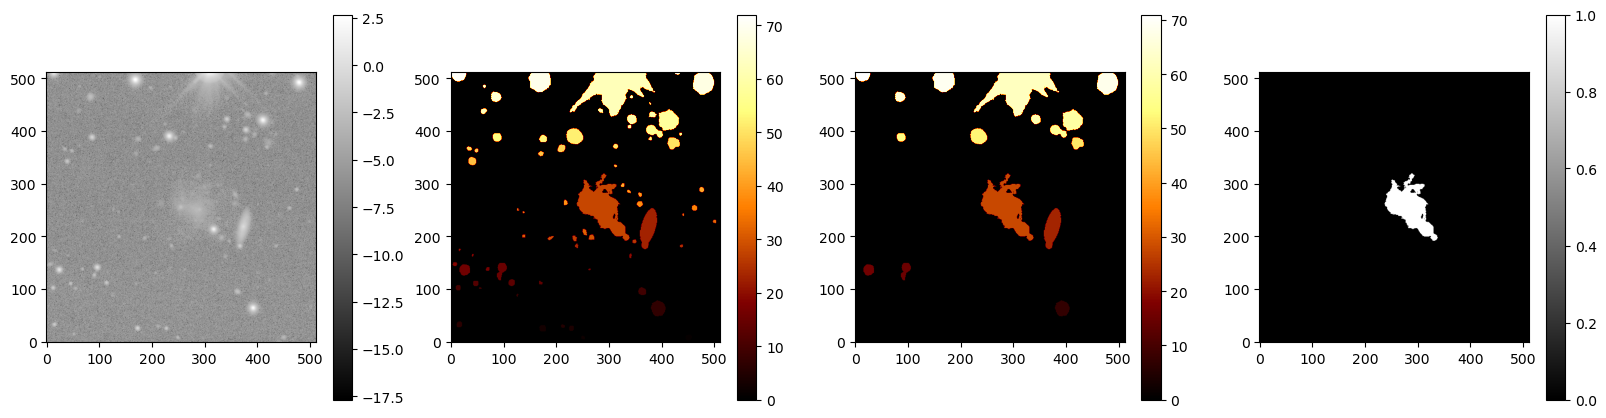

Error in file:  ./data\cutout_128.1068572998047_7.551541805267334.fits
Galaxy detected


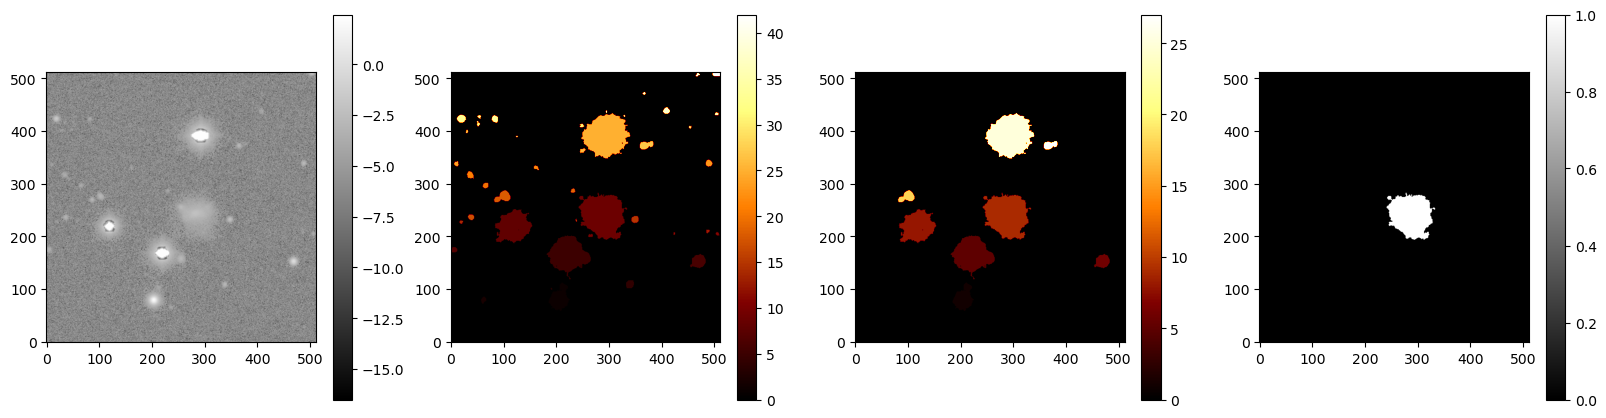

Galaxy detected


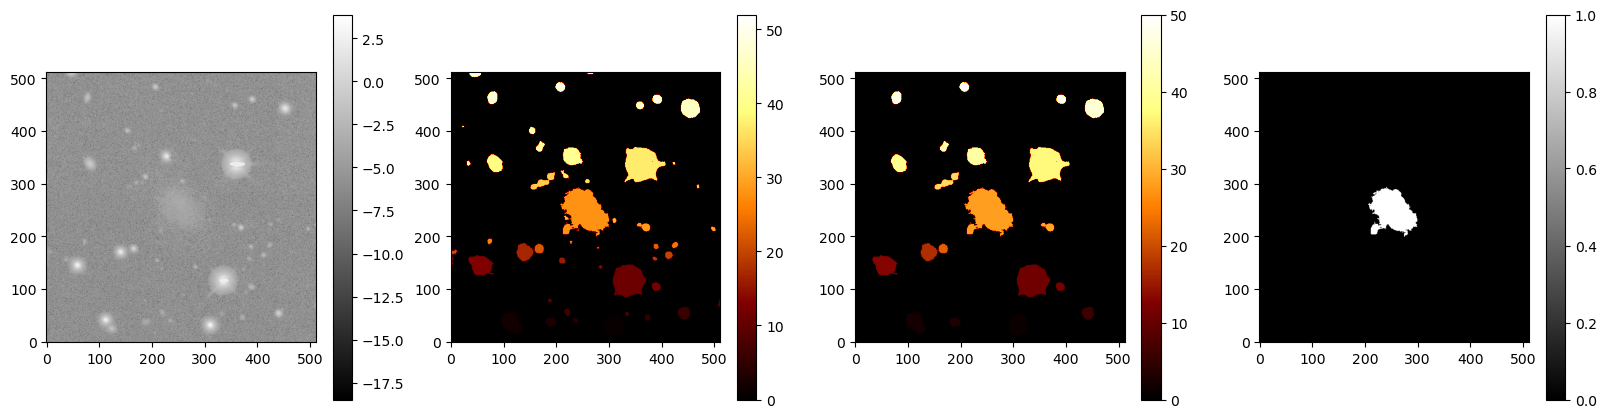

Galaxy detected


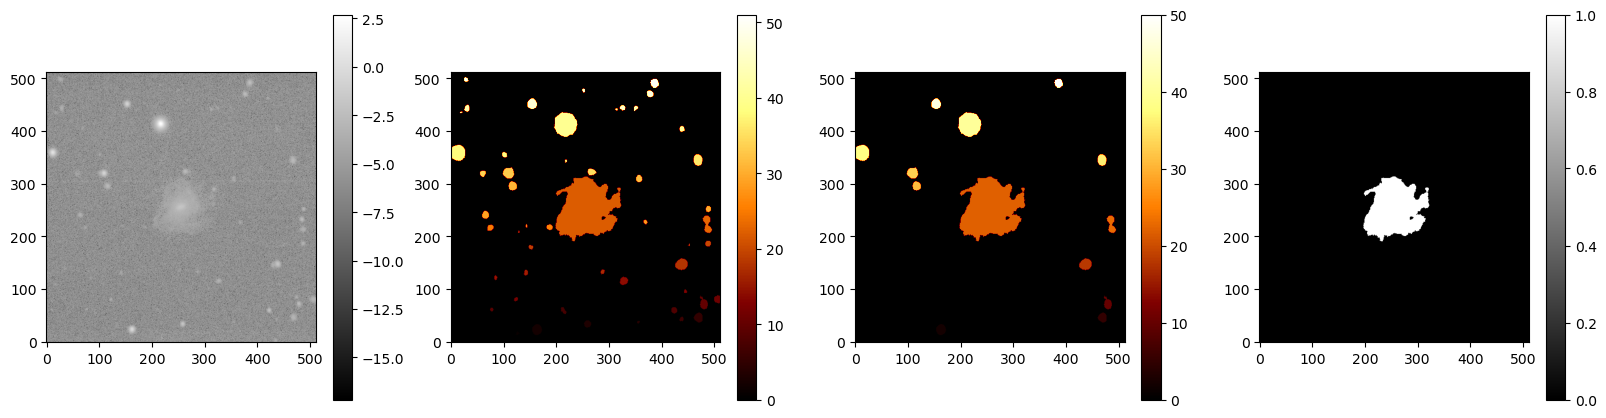

Galaxy detected


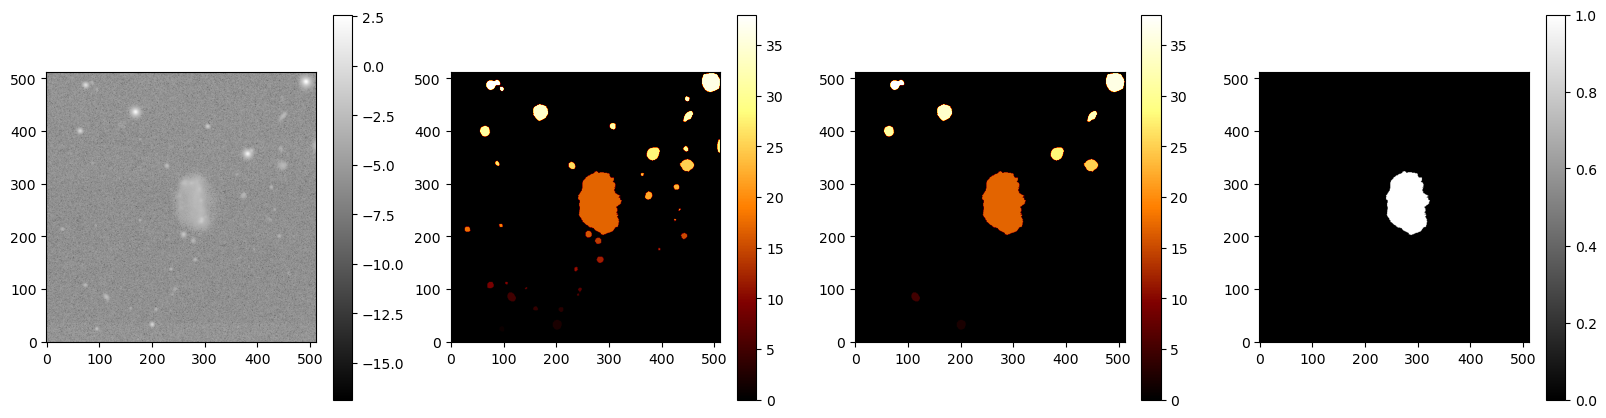

File:  ./data\cutout_133.5500946044922_20.73629379272461.fits
Galaxy detected


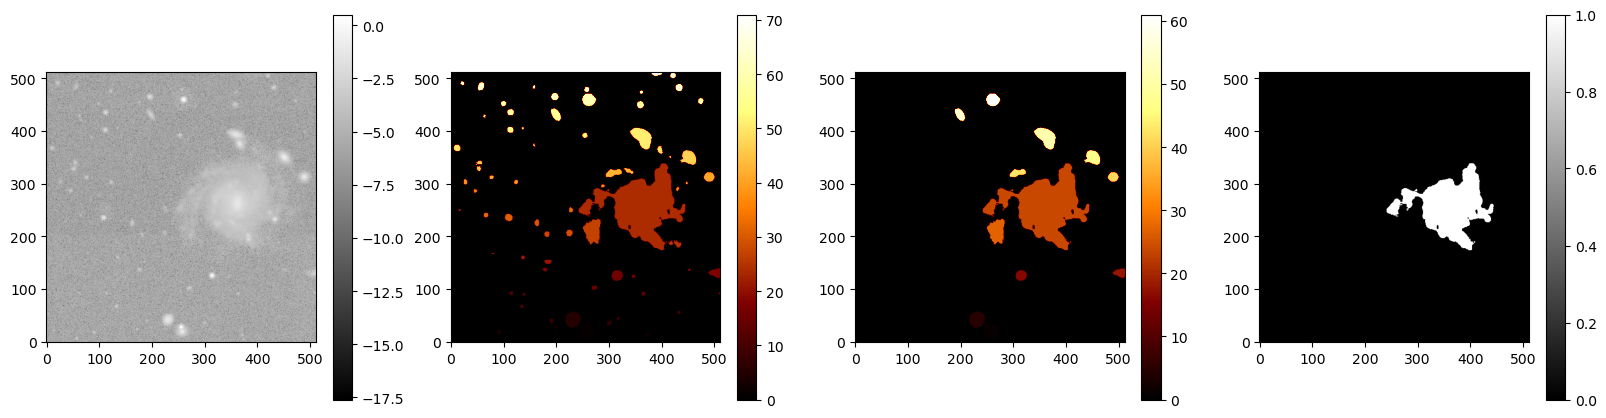

File:  ./data\cutout_137.81382751464844_-3.429427146911621.fits
Galaxy detected


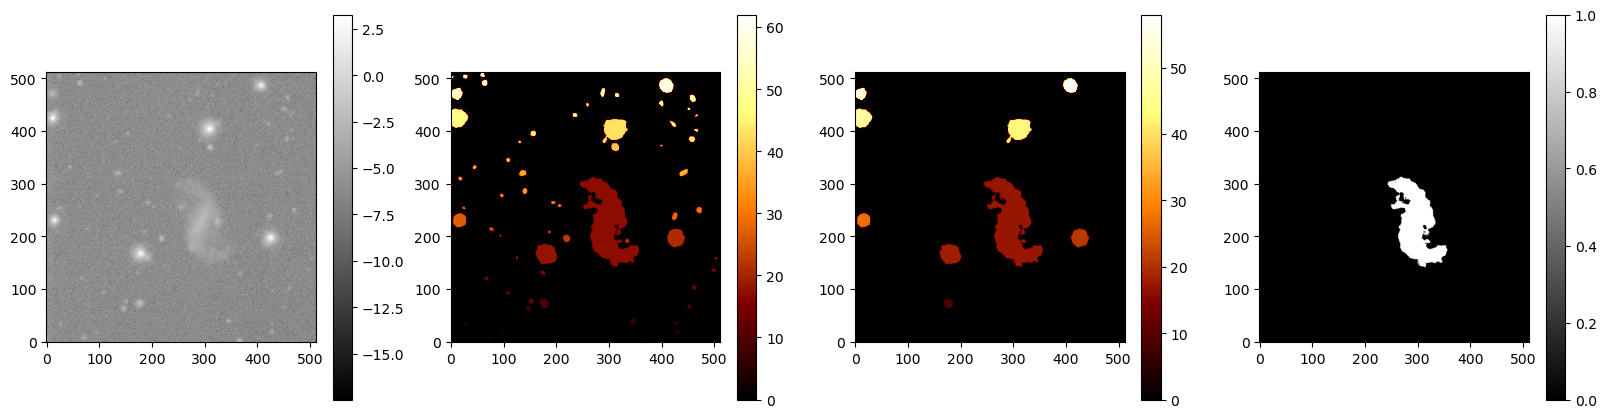

Galaxy detected


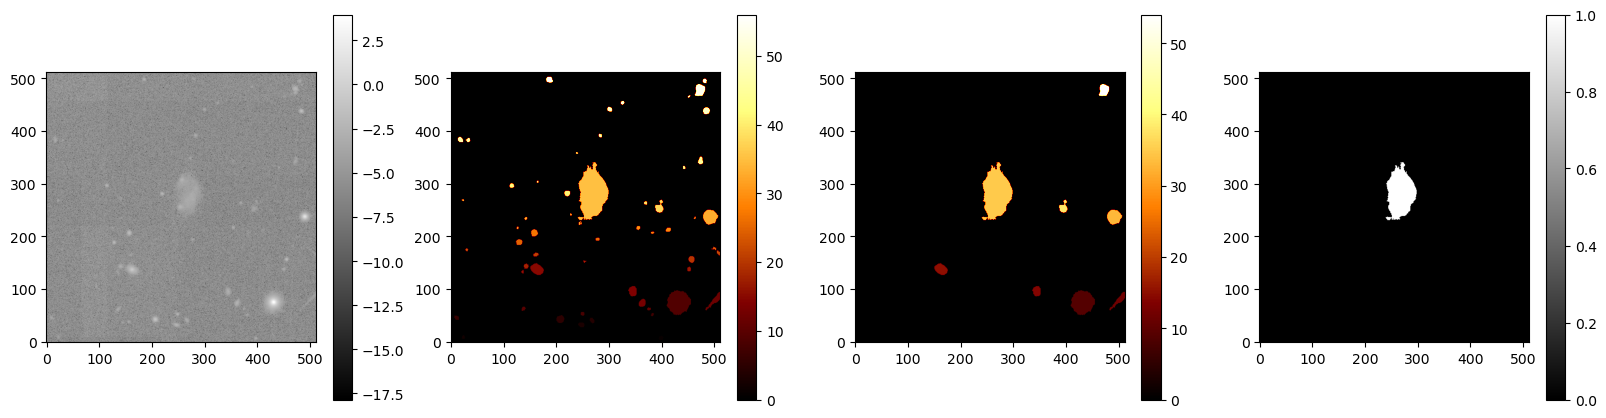

In [42]:
datapathlist  = glob.glob("./data/cutout*.fits")
for i in datapathlist:
   try:
      datafits = fits.open(i)

      data = np.where(datafits[0].data[1]> 0.5, 0.5, datafits[0].data[0])

      bkg_estimator = MedianBackground()
      bkg = Background2D(data, (50, 50), filter_size=(3, 3),
                        bkg_estimator=bkg_estimator)
      data -= bkg.background

      threshold = 1 * bkg.background_rms

      kernel = make_2dgaussian_kernel(150.0, size=7) 
      convolved_data = convolve(data, kernel)
      segment_map = detect_sources(convolved_data, threshold, npixels=10)
      segment_value = np.array(segment_map.data)

      new_segment_value = np.zeros_like(segment_value)

      for j in range(1, np.max(segment_value)+1):
         if np.sum(segment_value == j) > 200:
            new_segment_value += (segment_value == j) * j

      value_seg = np.unique(new_segment_value[250:325, 250:325])[1]
      galaxy_seg = np.where(new_segment_value == value_seg, 1, 0)

      if np.sum(galaxy_seg) > 2500:

         print("Galaxy detected")

         plt.figure(figsize=(20, 5))

         plt.subplot(1,4,1)
         plt.imshow(np.log(abs(datafits[0].data[1])), cmap='gray', origin='lower')
         plt.colorbar()

         plt.subplot(1,4,2)
         plt.imshow(segment_value, cmap='afmhot', origin='lower')
         plt.colorbar()

         plt.subplot(1,4,3)
         plt.imshow(new_segment_value, cmap='afmhot', origin='lower')
         plt.colorbar()

         plt.subplot(1,4,4)
         plt.imshow(galaxy_seg, cmap='gray', origin='lower')
         plt.colorbar()
         plt.show()
      else:
         print("File: ", i)
   
   except:

      print("Error in file: ", i)
      continue
   
   